# Titanic Dataset Analysis
Titanic Notebook: End-to-End ML Workflow

## Step 1: Data Loading and Initial Exploration

In [1]:
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Display first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Basic info and statistics
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Step 2: Data Cleaning and Preprocessing

In [3]:
# # Drop columns with too many missing or irrelevant info
# df.drop(['Cabin', 'PassengerId', 'Ticket', 'Name'], axis=1, inplace=True)

# # Fill missing Age with median, Embarked with mode
# df['Age'].fillna(df['Age'].median(), inplace=True)
# df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# # Convert categorical variables
# df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
# df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# df.head()

In [4]:
# Drop columns with too many missing or irrelevant info
df.drop(['Cabin', 'PassengerId', 'Ticket', 'Name'], axis=1, inplace=True)

# Fill missing Age with median, Embarked with mode — SAFE version
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Convert categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


## Step 3: Exploratory Data Analysis

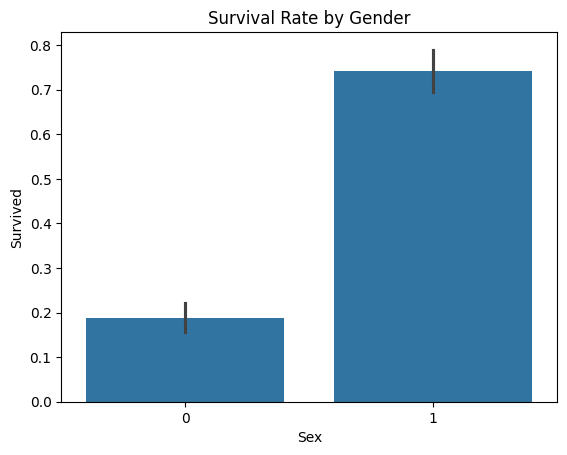

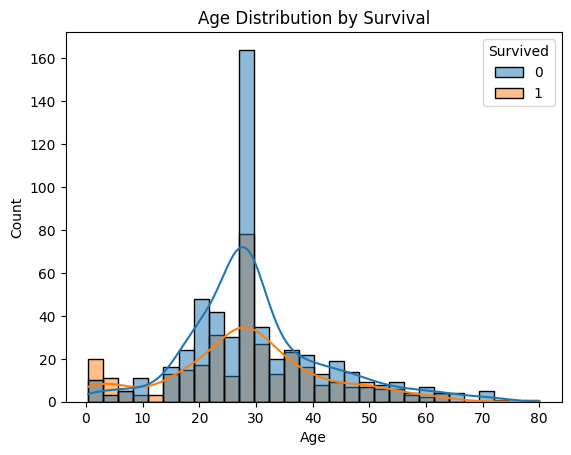

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()

# Age distribution by survival
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title("Age Distribution by Survival")
plt.show()

## Step 4: Statistical Analysis

In [6]:
import scipy.stats as stats

# T-test: Age difference between survivors and non-survivors
survivors = df[df['Survived'] == 1]['Age']
nonsurvivors = df[df['Survived'] == 0]['Age']
t_stat, p_val = stats.ttest_ind(survivors, nonsurvivors)

print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.3f}")

T-statistic: -1.939, P-value: 0.053


## Step 5: Data Visualization

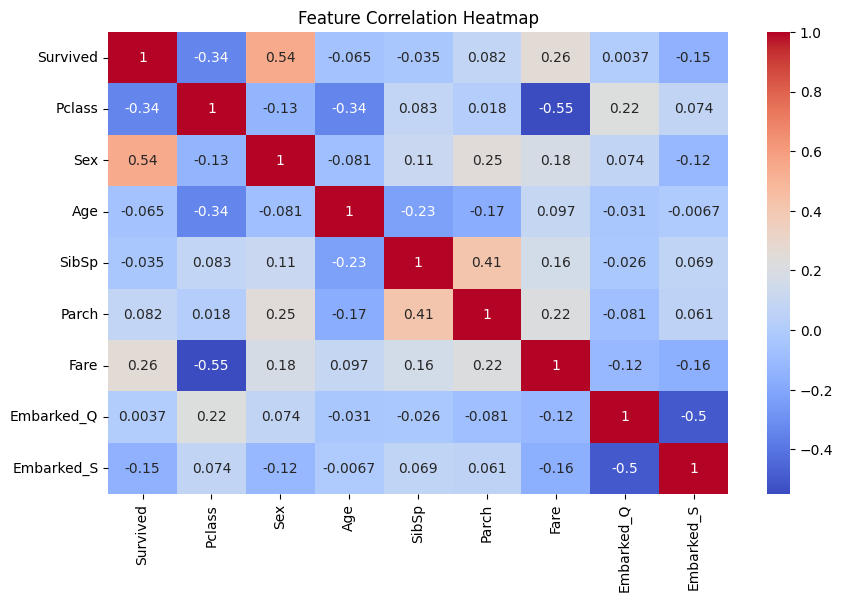

In [7]:
# Heatmap of correlations
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

## Step 6: Feature Engineering

In [8]:
# Family size
df['FamilySize'] = df['SibSp'] + df['Parch']
# Is alone
df['IsAlone'] = (df['FamilySize'] == 0).astype(int)
# Age bins
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 80], labels=False)

# Drop now redundant columns
df.drop(['SibSp', 'Parch', 'Age'], axis=1, inplace=True)

df.head()

,Survived,Pclass,Sex,Fare,Embarked_Q,Embarked_S,FamilySize,IsAlone,AgeBin
0,0,3,0,7.2500,False,True,1,0,2
1,1,1,1,71.2833,False,False,1,0,3
2,1,3,1,7.9250,False,True,0,1,2
3,1,1,1,53.1000,False,True,1,0,2
4,0,3,0,8.0500,False,True,0,1,2


## Step 7: Machine Learning Classification

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Support Vector Machine': SVC()
}

# Training
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('-' * 50)

Logistic Regression Accuracy: 0.8045
[[91 14]
 [21 53]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

--------------------------------------------------
Random Forest Accuracy: 0.8436
[[90 15]
 [13 61]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       105
           1       0.80      0.82      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179

--------------------------------------------------
Support Vector Machine Accuracy: 0.6592
[[99  6]
 [55 19]]
              precision    recall  f1-score   support

           0       0.64 

## Step 8: Model Evaluation and Comparison

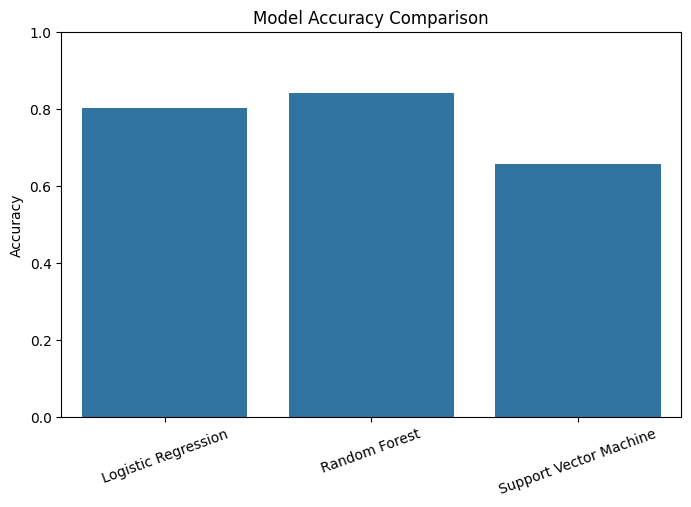

In [10]:
# Plotting accuracy of each model
accuracies = {
    name: accuracy_score(y_test, model.predict(X_test))
    for name, model in models.items()
}

plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.show()

## Step 9: Cross-Validation and Hyperparameter Tuning

✅ Fix: Encode All Categorical Features Before Model Training<br>
Make sure all categorical features are numerically encoded (via pd.get_dummies, LabelEncoder, or OneHotEncoder) before training or GridSearch.

In [11]:
# Encode All Categorical Variables (if not done already)

# Combine X and y temporarily to encode
df_model = pd.concat([X, y], axis=1)

# Encode all object-type (categorical) columns using pd.get_dummies
df_model_encoded = pd.get_dummies(df_model, drop_first=True)

# Split back into X and y
X_encoded = df_model_encoded.drop('Survived', axis=1)
y_encoded = df_model_encoded['Survived']

# Now split the encoded data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

In [12]:
from sklearn.model_selection import GridSearchCV

# Grid for Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)

rf_grid = GridSearchCV(estimator=rf, param_grid=rf_params, 
                       cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [13]:
print("Best Random Forest Parameters:", rf_grid.best_params_)
print("Best Cross-Validated Accuracy:", rf_grid.best_score_)

# Evaluate on test set
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("\nRandom Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Best Random Forest Parameters: {'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validated Accuracy: 0.832817886339013

Random Forest Test Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



## Step 10: Export Predictions to CSV

In [14]:
# We’ll take predictions from the best-tuned model (e.g. RandomForest) and save them with PassengerId for submission or further use.

predictions = best_rf.predict(X_test)

# Reconstruct a matching PassengerId index if needed
# For example, if you kept original indices:
output = pd.DataFrame({
    'PassengerId': X_test.index,
    'Survived': predictions
})

# Save to CSV
output.to_csv('titanic-predictions.csv', index=False)
print("Predictions exported to 'titanic-predictions.csv'")

Predictions exported to 'titanic-predictions.csv'


## Step 11: Extend with Deep Learning (Keras / TensorFlow)

In [15]:
# !pip install tensorflow

In [16]:
# Step 11: Deep Learning with Keras
from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

# Scale the data for neural network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# # Define the model
# model = Sequential([
#     Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
#     Dropout(0.3),
#     Dense(32, activation='relu'),
#     Dropout(0.3),
#     Dense(1, activation='sigmoid')
# ])
# Define the model using Input() as first layer
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  # <- replaces input_dim
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train
history = model.fit(X_train_scaled, y_train, 
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stop],
                    verbose=1)

# Evaluate
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Neural Network Test Accuracy: {accuracy:.4f}")

# Predict
y_pred_dl = (model.predict(X_test_scaled) > 0.5).astype("int32")

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6204 - loss: 0.6808 - val_accuracy: 0.7972 - val_loss: 0.5665
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6789 - loss: 0.5996 - val_accuracy: 0.7972 - val_loss: 0.5127
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7862 - loss: 0.5265 - val_accuracy: 0.8042 - val_loss: 0.4722
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7562 - loss: 0.5388 - val_accuracy: 0.8042 - val_loss: 0.4490
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7678 - loss: 0.5201 - val_accuracy: 0.8531 - val_loss: 0.4305
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7862 - loss: 0.4958 - val_accuracy: 0.8531 - val_loss: 0.4168
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8104 - loss: 0.4742 - val_accuracy: 0.8392 - val_loss: 0.4105
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7957 - loss: 0.4707 - val_accuracy: 0.8392 - 

## Step 11 (continued): Visualize Deep Learning Model Training
We’ll plot:
- Training vs Validation Loss
- Training vs Validation Accuracy

These are stored in the history object returned by model.fit().

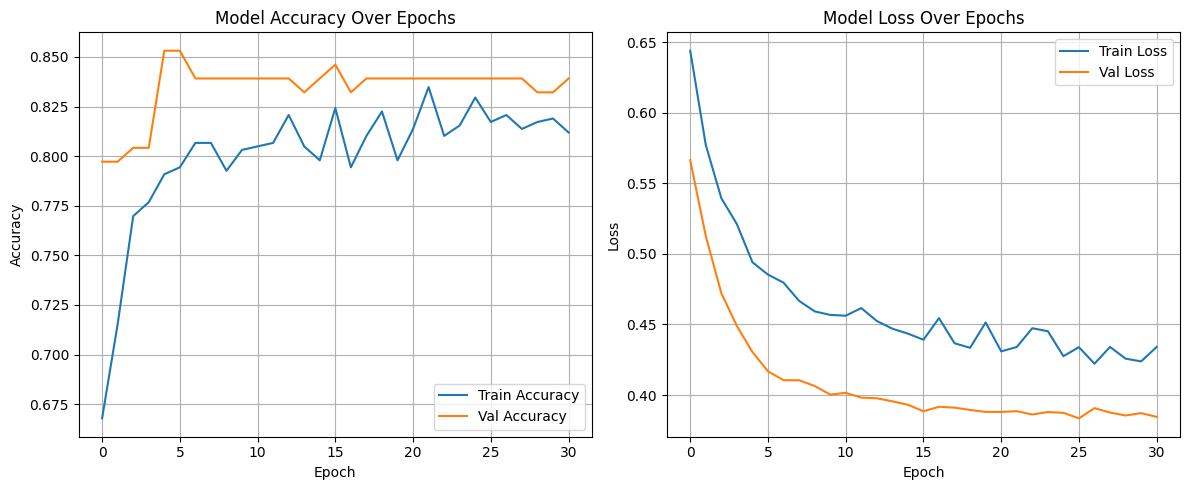

In [17]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()